The Lotka-Volterra (predator-prey) model represents a simplified model of the change in populations of two species which interact via predation. 

Let $x$ represents the prey population and $y$ represents the predator population, respectively. Then, the system of equations read
\begin{align}
&x' = \alpha x - \beta xy\\
&y' = -\gamma y + \delta xy
\end{align}
where $\alpha,\beta, \gamma,\delta \in \mathbb R_+$ are growth and deaths parameters (we are of course restricting to the case $x,y \geq 0$ in order for these solutions to make sense physically).

Up to a suitable rescaling ($x\mapsto \frac{\delta}{\alpha} x$, $y \mapsto \frac{\beta}{\alpha}y$, $t \mapsto \alpha t$), we can rewrite the system in the adimensional form
\begin{align}
&x' = x - xy\\
&y' = -\kappa y + xy
\end{align}
with $\kappa >0$.


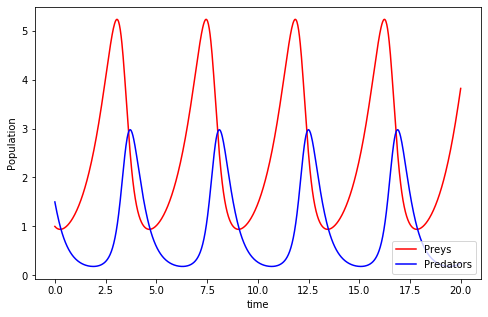

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

kappa = 2.5

def LotkaVolterra(X, t,kappa):
    x = X[0]; # preys
    y = X[1]; # predators
    dxdt =  x - x*y
    dydt = -kappa*y + x*y
    return np.array([dxdt, dydt])

tmax = 20.0; 
tmin = 0.0;
tspan = np.linspace(tmin, tmax, 1000)

X0 = [1.0, 1.5]  # initial conditions
Xsol = odeint(LotkaVolterra, X0, tspan, args = (kappa,))

plt.figure(figsize=(8,5))
plt.plot(tspan, Xsol[:,0], 'r-', label="Preys")
plt.plot(tspan, Xsol[:,1], 'b-', label="Predators")
plt.xlabel("time") 
plt.ylabel("Population") 
plt.legend(loc='lower right')
plt.show()

We can look for the equilibrium solutions: 
\begin{gather}
\left\{ x(t) = 0, \ y(t) = 0 \right\} \qquad \text{and} \qquad \left\{ x(t) = \kappa , \ y(t) = 1\right\}
\end{gather}

The orbits of the Lotka-Volterra system are the family of (closed) curves defined as
\begin{gather}
\frac{y}{e^{ y}} \frac{x^\kappa}{e^{ x}} = K
\end{gather}
for some poisitve constant $K$ that is identified by the initial conditions.

We plot here a collection of these curves:

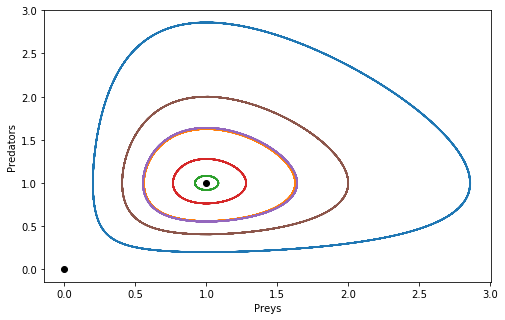

In [111]:
n_curves = 6;  # number of curves on the phase plot

prey0 = np.linspace(0.2, 2, n_curves);  # Initial number of preys
pred0 = 1.0  # Initial number of predators

plt.figure(figsize=(8,5))

plt.plot(kappa,1,'ko') 
plt.plot(0.0,0.0,'ko') 
#plt.vlines(x=c/d, ymin=0.0, ymax=3.0, ls='--')

for k in range(n_curves):
    Xsol = odeint(LotkaVolterra, [prey0[k], pred0], tspan, args=(kappa, ))
    plt.plot(Xsol[:,0], Xsol[:,1])
    
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()

If we vary the parameters, we can inspect how the orbits in the phase spaces vary. Note that by changing $\kappa$, the position of the stable equilibrium changes as well.

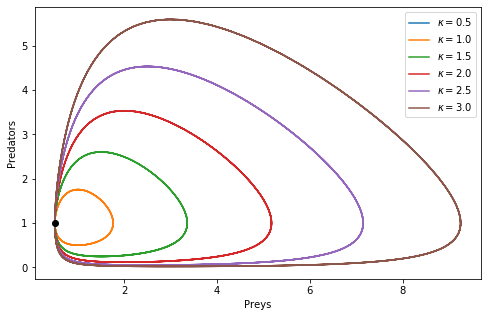

In [94]:
kappas = np.linspace(0.5, 3.0, 6)
X0 = [0.5, 1.0] # same initial condition

plt.figure(figsize=(8,5))

for kval in kappas:
    Xsol = odeint(LotkaVolterra, X0, tspan, args=(kval,))
    plt.plot(Xsol[:,0], Xsol[:,1], label=r'$\kappa = $'+str(kval));

plt.plot(.5,1.0,'ko') 
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.legend()
plt.show()

For small oscillations around the equilibrium point $(\kappa,1)$, 
\begin{gather}
\Delta x  = |x - \kappa| \ll 1, \qquad \Delta y  = |y - 1| \ll 1\ ,
\end{gather}
the populations of predators and preys oscillate with a period $T$, which depends on the parameter $\kappa$ and the initial conditions $(x_0, y_0)$. 

It can be analytically proven that 
\begin{gather}
T = \frac{2\pi}{\sqrt{\kappa}}
\end{gather}

In [109]:
def findperiod(ts,xs,ys, kappa):
    """This function estimates the period of the orbits.
    It looks for zeros of x', corresponding to maxima and minima of the functions
    Rather than look for x'=0 directly, the function tests for a change in the sign of x',
    and then uses linear interpolation.
    The function returns the average of the periods found.    
    """
    Ts = []
    for i in range(1,len(ts)):
        pt0 = (xs[i-1],ys[i-1])
        pt1 = (xs[i],ys[i])
        dx0 = LotkaVolterra(pt0, ts[i-1], kappa)[0]
        dx1 = LotkaVolterra(pt1, ts[i], kappa)[0]
        if dx0*dx1 < 0:
            # dx/dt has changed sign; use linear interpolation to estimate the 't' value.
            t0, t1 = ts[i-1], ts[i]
            dt = t1-t0
            ddx = dx1-dx0
            T = t0 - dx0*dt/ddx
            Ts.append(T)
            
    if len(Ts) >= 3:
        if len(Ts) % 2 == 1:  # if an odd number of maxima and minima are found, do this ...
            T = 2*(Ts[-1] - Ts[0]) / (len(Ts)-1)
        else:
            T = 2*(Ts[-2] - Ts[0]) / (len(Ts)-2)
    else:
        print("Can't estimate the period: more data needed. ", xs[0])
        T = 0
    return T

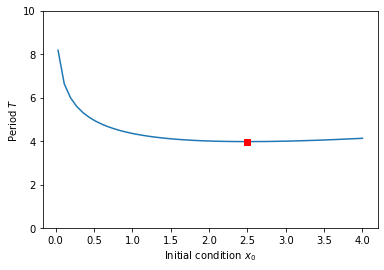

In [114]:
kappa = 2.5
x0s = np.linspace(0.03, 4.0, 50)
periods0 = np.zeros(len(x0s))

tmax = 60.0; 
tmin = 0.0;
tspan = np.linspace(tmin, tmax, 1000)

for i in range(len(x0s)):
    X0 = [x0s[i], 1.]
    Xsol = odeint(LotkaVolterra, X0, tspan, args=(kappa,)) 
    periods0[i] = findperiod(tspan, Xsol[:,0], Xsol[:,1],kappa)

plt.xlabel("Initial condition $x_0$")
plt.ylabel("Period $T$")
plt.ylim(0,10)
plt.plot(x0s, periods0, '-');
plt.plot([kappa], [2*np.pi/np.sqrt(kappa)], 'rs'); # the exact value of the period
plt.show()

We can now generalize the model by introducing possible external factors that affect the dynamics. This will pertube the system and in general the solutions will not be periodic.

**Harvesting:**  suppose that the prey species is hunted by an outside agent (e.g. humans). We may model this effect, for example, by adding a constant factor $h(t,x) = \epsilon$ (if the hunt is undiscriminating) or a linear factor $h(t,x)= \epsilon x$ in the equation for $x'$, with $\epsilon>0$.

In the latter case, the system reads
\begin{align}
&x' =  x -  xy -\epsilon x\\
&y' = -\gamma y +  xy 
\end{align}

The analysis in this case is very similar to the unperturbed case ($\epsilon=0$): the (stable) equilibrium point will simply be a translation of the unperturbed equilibrium point: 
\begin{gather}
\left\{ x(t) = \kappa, \ y(t) = 1-\epsilon\right\}
\end{gather}
assuming $\epsilon<1$.
Note that in the case $\epsilon>1$, there is no equilibrium point and the harvesting term leads to the extinction of the prey population, where we say that a population is extinct once the value of $x$ is smaller than some threshold value (say, $0.0001$).


In the former case, we have
\begin{align}
&x' =  x -  xy -\epsilon\\
&y' = -\gamma y +  xy 
\end{align}
Also in this case, notice that typically a harvesting term leads to extinction of the prey populations. 

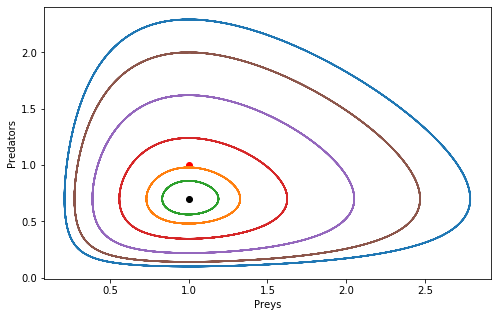

[1.01, 0.91]


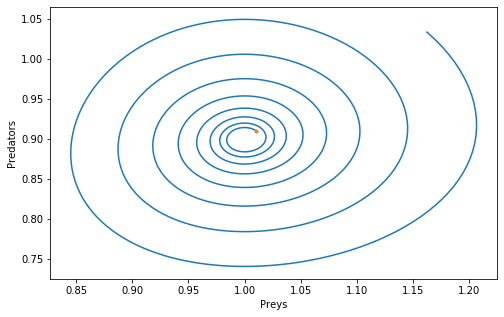

In [179]:
eps_lin = 0.3
eps_const = 0.1
kappa = 1.0


def LotkaVolterra_eps(X, t,kappa,eps):
    x = X[0]; # preys
    y = X[1]; # predators
    dxdt =  x - x*y-eps*x
    dydt = -kappa*y + x*y
    return np.array([dxdt, dydt])

def LotkaVolterra_epsx(X, t,kappa,eps):
    x = X[0]; 
    y = X[1]; 
    dxdt =  x - x*y-eps
    dydt = -kappa*y + x*y
    return np.array([dxdt, dydt])


## linear perturbation
n_curves = 6
prey0 = 1.0; 
pred0 = np.linspace(0.1, 2, n_curves) 

plt.figure(figsize=(8,5))

plt.plot(kappa,1,'ro')  # equilibrium point of the unperturbed system
plt.plot(kappa,1-eps_lin,'ko') # equilibrium point of the perturbed system

for k in range(n_curves):
    Xsol = odeint(LotkaVolterra_eps, [prey0, pred0[k]], tspan, args=(kappa,eps_lin, ))
    plt.plot(Xsol[:,0], Xsol[:,1])
    
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()



## constant perturbation

X0 = [kappa +0.01, 1 - eps_const/kappa +0.01]
print(X0)
Xsol = odeint(LotkaVolterra_epsx, X0, tspan, args=(kappa,eps_const, ))

plt.figure(figsize=(8,5))
plt.plot(Xsol[:,0], Xsol[:,1])
plt.plot(X0[0],X0[1],'.')
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()

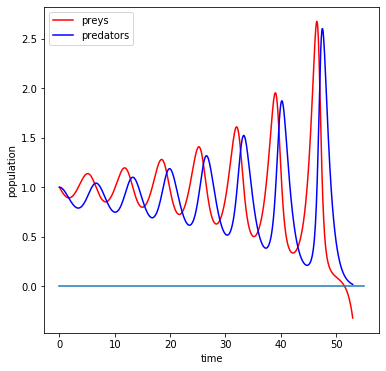

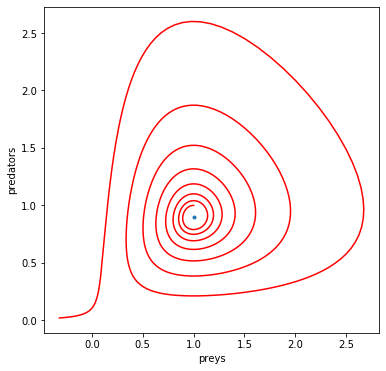

In [172]:
# An example plot, showing extinction.
eps=0.1
kappa=1

tmax = 53.0; 
tmin = 0.0;
tspan = np.linspace(tmin, tmax, 1000)

X0 = [1.0 , 1.0]

Xsol = odeint(LotkaVolterra_epsx, X0, tspan, args=(kappa,eps, ))

plt.figure(figsize=(6,6))
plt.xlabel('time')
plt.ylabel('population')
plt.plot(tspan, Xsol[:,0], 'r-', label='preys')
plt.plot(tspan, Xsol[:,1], 'b-', label='predators')
plt.legend(loc=0);
plt.plot([0,55],[0,0],'-')
plt.show()


# Same data, showing the phase space.
plt.figure(figsize=(6,6))
plt.xlabel('preys')
plt.ylabel('predators')
plt.plot(Xsol[:,0], Xsol[:,1], 'r-')
plt.plot([kappa], [1-eps/kappa], ".")  # the fixed point
plt.show()

**Disease:** suppose now the prey population suffers from a seasonal disease. The effect on the population may be modelled by a function 
\begin{gather}
h(x,t) = \omega x \sin^2\left(\frac{ t}{\tau}\right)
\end{gather}
where $\omega, \tau \in \mathbb R_+$

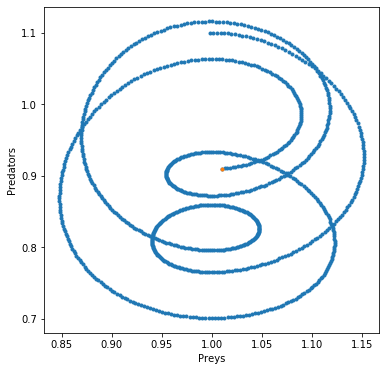

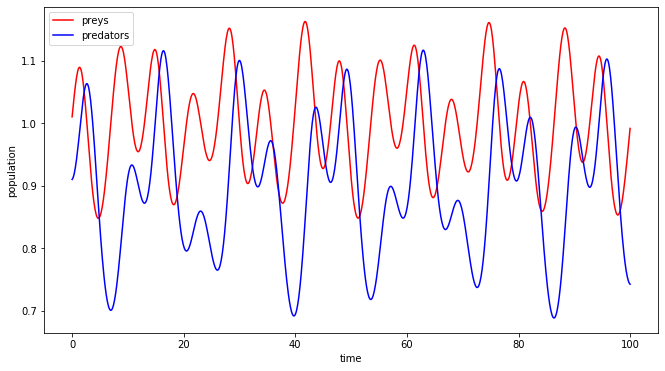

In [192]:
def LotkaVolterra_disease(X, t,kappa,omega,tau):
    x = X[0]; 
    y = X[1]; 
    dxdt =  x - x*y-omega*x*np.sin(t/tau)**2
    dydt = -kappa*y + x*y
    return np.array([dxdt, dydt])


tspan1 = np.linspace(0,30,1000)
kappa = 1
omega = 0.2
tau = 5

x0, y0 = kappa +0.01, 1 - 0.1/kappa +0.01
Xsol1 = odeint(LotkaVolterra_disease, [x0,y0], tspan1, args=(kappa,omega,tau,))


plt.figure(figsize=(6,6))
plt.xlabel("Preys"); plt.ylabel("Predators")
plt.plot(Xsol1[:,0], Xsol1[:,1], '.')
plt.plot([x0], [y0], ".")
plt.show()



tspan2 = np.linspace(0,100,1000)
Xsol2 = odeint(LotkaVolterra_disease, [x0,y0], tspan2, args=(kappa,omega,tau,))


plt.figure(figsize=(11,6))
plt.xlabel('time')
plt.ylabel('population')
plt.plot(tspan2, Xsol2[:,0], 'r-', label='preys')
plt.plot(tspan2, Xsol2[:,1], 'b-', label='predators')
plt.legend()
plt.show()

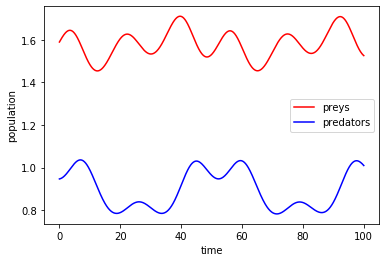

In [194]:
# Try the case where the period of the system without disease is the same as tau

tspan = np.linspace(0,100,1000)
kappa = 1
omega = 0.2
tau = 5
tau = 5
kappa = (2*np.pi/tau)**2
#print(kappa)

x0, y0 = kappa +0.01, 1 - 0.1/kappa +0.01
Xsol = odeint(LotkaVolterra_disease, [x0,y0], tspan1, args=(kappa,omega,tau,))

plt.xlabel('time')
plt.ylabel('population')
plt.plot(tspan, Xsol[:,0], 'r-', label='preys')
plt.plot(tspan, Xsol[:,1], 'b-', label='predators')
plt.legend(loc=0)

Another model of predator-prey interactions is the system of differential equations
\begin{align}
&x' = \alpha x - \beta xy -\eta x^2\\
&y' = -\gamma y + \delta xy - \zeta y^2
\end{align}
with $\eta,\zeta \in \mathbb R_+$.

Here, the term $\eta x^2$ reflects the internal competition of the prey $x$ for their limited external resources, and the term $\zeta y^2$ reflects the competition among the predators for the limited number of prey. 

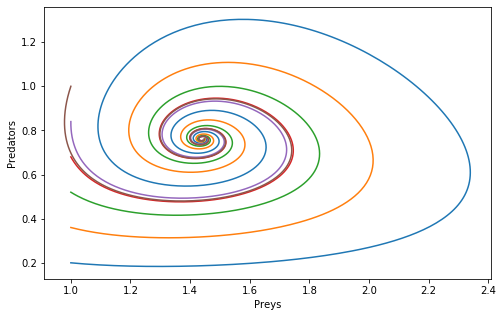

In [64]:
a,b,c,d,e,f = .6,.6,1,.8,.1,.2

def LotkaVolterra_resources(X, t,a,b,c,d,e,f):
    x = X[0]; # preys
    y = X[1]; # predators
    dxdt =  a*x - b*x*y-e*x**2
    dydt = -c*y + d*x*y-f*y**2
    return np.array([dxdt, dydt])


tmax = 30.0; 
tmin = 0.0;
tspan = np.linspace(tmin, tmax, 1000)


n_curves = 6
prey0 = 1.0; 
pred0 = np.linspace(0.2, 1, n_curves) 

plt.figure(figsize=(8,5))

#plt.plot(c/d,a/b,'ro')  # equilibrium point of the unperturbed system

for k in range(n_curves):
    Xsol = odeint(LotkaVolterra_resources, [prey0, pred0[k]], tspan, args=(a,b,c,d,e,f, ))
    plt.plot(Xsol[:,0], Xsol[:,1])
    
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()

#### References
S. Dolan's [course MAS212](https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html) at University of Sheffield, UK.